# Final Project Part 2: Data Cleaning and EDA

---

### Import libraries: pandas, numpy, seaborn, and matplotlib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
%matplotlib inline

### Read Dataset

In [2]:
electronics_df = pd.read_csv('../../data/kz.csv')

### Examine the data

In [3]:
# Print number of rows and columns
electronics_df.shape

(2633521, 8)

In [4]:
# Print the first five rows
electronics_df.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


In [5]:
# Print random five rows
electronics_df.sample(5)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2462967,2020-10-06 10:53:59 UTC,2388440981134590756,1515966223523303321,NaN,16.18,1515915625512202000,NaN,NaN
1655471,2020-07-09 08:38:29 UTC,2353292221018538425,1515966223509088620,2.360742e+18,appliances.environment.air_conditioner,ava,138.87,1.515916e+18
170543,2020-01-15 04:38:47 UTC,2348772866780037499,1515966223523303308,NaN,29.63,NaN,NaN,NaN
256393,2020-01-24 08:58:51 UTC,2348778469128667863,1515966223527009170,NaN,0.58,NaN,NaN,NaN
354794,2020-02-03 10:36:53 UTC,2348785682509464562,1515966223523303310,NaN,8.10,NaN,NaN,NaN


In [6]:
# summary statistics
electronics_df.describe()

,order_id,product_id,category_id,price,user_id
count,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
std,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07
min,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18


In [7]:
# Check datatypes of each column 
electronics_df.dtypes

event_time        object
order_id           int64
product_id         int64
category_id      float64
category_code     object
brand             object
price            float64
user_id          float64
dtype: object

In [8]:
electronics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


## DATA CLEANING

### Checking for all missing values

In [9]:
# Check for missing values using the isnull() function and count them using sum().
electronics_df.isnull().sum()

event_time             0
order_id               0
product_id             0
category_id       431954
category_code     612202
brand             506005
price             431954
user_id          2069352
dtype: int64

### Filtering out data that has null values

In [10]:
electronics_df[electronics_df['category_code'].isnull()][['category_id','category_code','price', 'user_id']].head(10)

,category_id,category_code,price,user_id
4,2.268105e+18,NaN,217.57,1.515916e+18
16,2.268105e+18,NaN,23.13,1.515916e+18
18,2.268106e+18,NaN,6.94,1.515916e+18
19,2.268106e+18,NaN,6.94,1.515916e+18
25,2.268105e+18,NaN,0.02,1.515916e+18
26,2.268105e+18,NaN,0.02,1.515916e+18
28,2.268105e+18,NaN,6.23,1.515916e+18
29,2.268105e+18,NaN,6.23,1.515916e+18
39,2.268105e+18,NaN,9.24,1.515916e+18
44,2.268105e+18,NaN,20.81,1.515916e+18


### Drop all null values

In [11]:
# Drop all columns that contain null values using dropna()
electronics_df.dropna(subset=['category_id','category_code','price','user_id'], inplace=True)

In [12]:
# Check if there are still missing values.
electronics_df.isnull().sum()

event_time           0
order_id             0
product_id           0
category_id          0
category_code        0
brand            14081
price                0
user_id              0
dtype: int64

In [13]:
# Replace all missing value in Brand column with "No Brand" value using fillna() function.
electronics_df.brand.isnull()
electronics_df.brand.fillna('no brand',inplace=True)

In [14]:
# Print last ten rows using tail()
electronics_df.tail(10)

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
2633509,2020-11-21 10:04:07 UTC,2388440981134693936,1515966223509353752,2.268105e+18,appliances.environment.air_heater,resanta,46.97,1.515916e+18
2633510,2020-11-21 10:04:42 UTC,2388440981134693937,1515966223509088671,2.268105e+18,electronics.smartphone,apple,925.67,1.515916e+18
2633511,2020-11-21 10:05:04 UTC,2388440981134693938,1515966223509088509,2.268105e+18,electronics.smartphone,apple,925.67,1.515916e+18
2633512,2020-11-21 10:06:01 UTC,2388440981134693939,1515966223509090132,2.268105e+18,computers.peripherals.printer,canon,299.98,1.515916e+18
2633514,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223519279912,2.374499e+18,electronics.video.tv,samsung,1736.09,1.515916e+18
2633515,2020-11-21 10:08:54 UTC,2388440981134693941,1515966223509088622,2.374499e+18,electronics.video.tv,lg,370.35,1.515916e+18
2633516,2020-11-21 10:10:01 UTC,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13 UTC,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633520,2020-11-21 10:10:30 UTC,2388440981134693944,1515966223509127566,2.268105e+18,appliances.kitchen.blender,redmond,53.22,1.515916e+18


In [15]:
# Verify if there are still missing values.
electronics_df.isnull().sum()

event_time       0
order_id         0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
dtype: int64

In [16]:
quantity_order = pd.DataFrame(electronics_df.groupby('order_id').count()['user_id'])
quantity_order.groupby('user_id').user_id.count()

user_id
1     276690
2      42383
3      12059
4       4366
5       1613
6        788
7        392
8        206
9        102
10        68
11        39
12        18
13        10
14         8
16         2
Name: user_id, dtype: int64

### Splitting category code column into separate category and product column

In [17]:
# Split a string into separate columns in a dataframe using split ().
new_column = electronics_df["category_code"].str.split(".", n = 1, expand = True)

In [18]:
# Adding product category column to a new data frame 
electronics_df["category"]= new_column[0]

# Adding product column 
electronics_df["product"]= new_column[1]

# Dropping the category_code columns 
electronics_df.drop(columns =["category_code"], inplace = True)

electronics_df.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,category,product
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,electronics,tablet
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,electronics,tablet
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18,electronics,audio.headphone
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18,electronics,audio.headphone
5,2020-04-26 08:45:57 UTC,2295716521449619559,1515966223509261697,2.268105e+18,maestro,39.33,1.515916e+18,furniture,kitchen.table


In [19]:
# Change the order of dataframe.
new_columns = ['event_time','user_id','order_id','product_id','category_id','category','product','brand','price']
electronics_df = electronics_df[new_columns]

electronics_df.head()

,event_time,user_id,order_id,product_id,category_id,category,product,brand,price
0,2020-04-24 11:50:39 UTC,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
1,2020-04-24 11:50:39 UTC,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
2,2020-04-24 14:37:43 UTC,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
3,2020-04-24 14:37:43 UTC,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
5,2020-04-26 08:45:57 UTC,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


### Splitting timestamp column into separate date and time column

In [20]:
# Convert to actual date format using pd.to_datetime() method
electronics_df['order_date'] = pd.to_datetime(electronics_df['event_time']).dt.date
electronics_df['order_time'] = pd.to_datetime(electronics_df['event_time']).dt.time
electronics_df.head()

,event_time,user_id,order_id,product_id,category_id,category,product,brand,price,order_date,order_time
0,2020-04-24 11:50:39 UTC,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24,11:50:39
1,2020-04-24 11:50:39 UTC,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24,11:50:39
2,2020-04-24 14:37:43 UTC,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24,14:37:43
3,2020-04-24 14:37:43 UTC,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24,14:37:43
5,2020-04-26 08:45:57 UTC,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33,2020-04-26,08:45:57


In [21]:
# Remove the event_time column using drop()
electronics_df.drop('event_time', axis=1, inplace=True)
electronics_df.head()

,user_id,order_id,product_id,category_id,category,product,brand,price,order_date,order_time
0,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24,11:50:39
1,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24,11:50:39
2,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24,14:37:43
3,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24,14:37:43
5,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33,2020-04-26,08:45:57


In [22]:
# Change the order of dataframe column and move the last element to the first position
# Convert the column into a list using tolist() 
cols = electronics_df.columns.tolist()

# Shift the last column to the first column
cols = cols[-1:] + cols[:-1] 
electronics_df = electronics_df[cols]
electronics_df.head()

,order_time,user_id,order_id,product_id,category_id,category,product,brand,price,order_date
0,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24
1,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,2020-04-24
2,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24
3,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,2020-04-24
5,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33,2020-04-26


In [23]:
cols = electronics_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
electronics_df = electronics_df[cols]
electronics_df.head()

,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,price
0,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
1,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
2,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
3,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
5,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


In [24]:
# Convert order_date into month name using dt.month_name() and add a new column.
electronics_df['month'] = pd.to_datetime(electronics_df['order_date']).dt.month_name()
electronics_df.head()

,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,price,month
0,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,April
1,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01,April
2,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,April
3,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52,April
5,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33,April


In [25]:
# Move the last element to the first position
cols = electronics_df.columns.tolist()
cols = cols[-1:] + cols[:-1] 
electronics_df = electronics_df[cols]
electronics_df.head()

,month,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,price
0,April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
1,April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
2,April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
3,April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
5,April,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


In [26]:
# Set the Month column as the index
electronics_df.set_index('month', inplace=True)

In [27]:
electronics_df.head()

,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,price
month,,,,,,,,,,
April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
April,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


In [28]:
# Change the price column name to sales using rename()
electronics_df.rename(columns={'price': 'sales'}, inplace=True)
electronics_df.head()

,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,sales
month,,,,,,,,,,
April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
April,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


#### Now the dataset is ready for EDA. Export the clean dataframe to a new csv file

In [29]:
electronics_df.to_csv('../../data/data_clean.csv')

## EDA

In [30]:
# Read Dataset
df= pd.read_csv('../../data/data_clean.csv')

In [31]:
# Print the first five rows
df.head()

,month,order_date,order_time,user_id,order_id,product_id,category_id,category,product,brand,sales
0,April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
1,April,2020-04-24,11:50:39,1.515916e+18,2294359932054536986,1515966223509089906,2.268105e+18,electronics,tablet,samsung,162.01
2,April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
3,April,2020-04-24,14:37:43,1.515916e+18,2294444024058086220,2273948319057183658,2.268105e+18,electronics,audio.headphone,huawei,77.52
4,April,2020-04-26,08:45:57,1.515916e+18,2295716521449619559,1515966223509261697,2.268105e+18,furniture,kitchen.table,maestro,39.33


### What are the top selling products by revenue?

In [32]:
# Group data by product, apply the sum() function to calculate the total revenue
best_selling_prods = pd.DataFrame(df.groupby('product').sum()['sales'])
best_selling_prods = best_selling_prods.reset_index()
best_selling_prods = best_selling_prods.sort_values(by=['sales'], ascending=False)
best_selling_prods = best_selling_prods.head(10)
best_selling_prods

,product,sales
95,smartphone,4.127144e+07
78,notebook,1.479807e+07
120,video.tv,8.778622e+06
67,kitchen.refrigerators,8.635238e+06
71,kitchen.washer,4.943330e+06
46,environment.vacuum,2.446178e+06
101,tablet,2.346147e+06
25,clocks,2.186701e+06
60,kitchen.hood,1.995485e+06
42,environment.air_conditioner,1.826759e+06


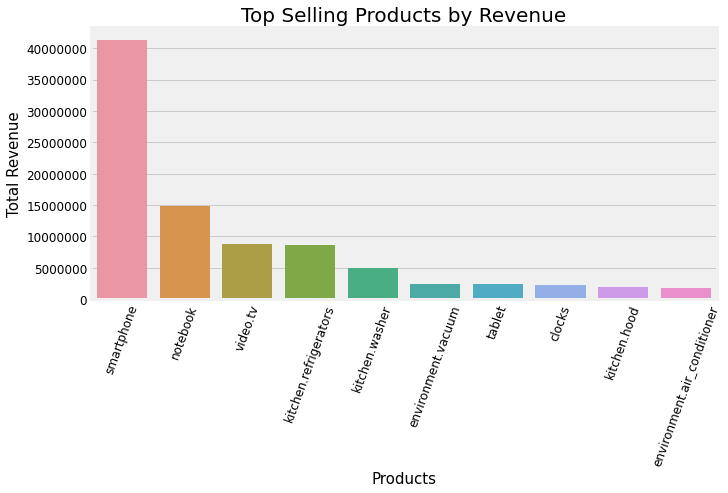

In [33]:
# Visualize using bar chart
plt.figure(figsize=(10,5))
plt.ticklabel_format(useOffset=False, style='plain')
ax = sns.barplot(y="sales", x="product", data=best_selling_prods)
plt.xticks(rotation=70)

ax.axes.set_title("Top Selling Products by Revenue",fontsize=20)
ax.set_xlabel("Products",fontsize=15)
ax.set_ylabel("Total Revenue",fontsize=15)
ax.tick_params(labelsize=12)

### How many items each customer buy?
#### Analyze the customer behavior by finding out how many items added to the cart.

In [34]:
# Rename the user_id column
quantity_order = df.rename(columns={'user_id':"basket_size"})

# Group data by order id, apply the count () function to calculate the total number of item
quantity_order = pd.DataFrame(quantity_order.groupby('order_id').count()['basket_size'])
quantity_order.groupby('basket_size').basket_size.count()

basket_size
1     276690
2      42383
3      12059
4       4366
5       1613
6        788
7        392
8        206
9        102
10        68
11        39
12        18
13        10
14         8
16         2
Name: basket_size, dtype: int64

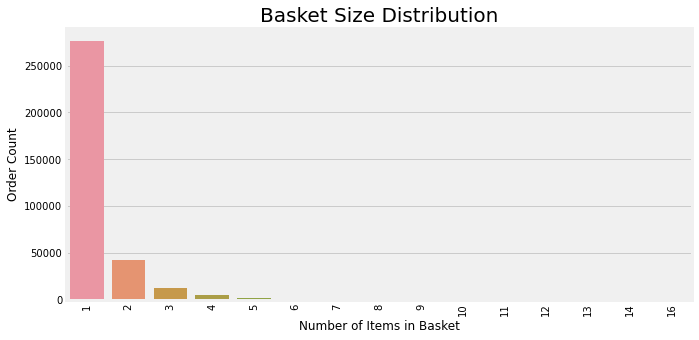

In [35]:
# Visualize using bar chart
plt.figure(figsize=(10,5))
plt.ticklabel_format(useOffset=False, style='plain')
basket = sns.countplot(x = "basket_size", data = quantity_order);
plt.xticks(rotation=90)
plt.title('Basket Size Distribution', fontsize=20);
basket.set_xlabel("Number of Items in Basket");
basket.set_ylabel("Order Count");

### 81% of customers are checking out with single item in the cart.

One assumption that can be made is that customers keep spending hours scrolling through thousands of items, struggling to find an item they want and they will end out losing interest and buying only a single item. Customers need to be provided suggestions based on their interests in order to create a better shopping environment that stimulates demand and boosts sales.